In [87]:
# Import packages for data analysis
import pandas   as pd
import numpy    as np
import datetime as dt
import matplotlib.pyplot as plt

In [88]:
# Read in Chicago speed camera csv data
chicago_cameras = pd.read_csv('Speed_Camera_Violations.csv')

In [89]:
# Inspect the data
chicago_cameras.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [90]:
# Change 'VIOLATION DATE' column from str type to datetime type
chicago_cameras['VIOLATION DATE'] = pd.to_datetime(chicago_cameras['VIOLATION DATE'], format = '%m/%d/%Y')
chicago_cameras.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,2014-07-08,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,2014-07-16,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,2014-07-08,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,2014-07-26,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,2014-07-27,92,NaN,NaN,NaN,NaN,NaN


In [91]:
# Get total number of days in data set
nDays = len(set(chicago_cameras.loc[:,'VIOLATION DATE']))
nDays

1637

In [92]:
# Get number of unique traffic cameras
nCameras = len(set(chicago_cameras.loc[:,'CAMERA ID']))
nCameras

162

In [93]:
# Take subset of the full data set
violations = chicago_cameras.loc[:,['VIOLATION DATE', 'VIOLATIONS']]
violations = violations.sort_values(by = 'VIOLATION DATE')
violations.head()

,VIOLATION DATE,VIOLATIONS
15822,2014-07-01,7
15645,2014-07-01,68
15641,2014-07-01,64
11845,2014-07-01,10
11846,2014-07-01,32


In [94]:
# Find total number of violations for each day and violations per camera for each day
daily_per_cam = violations.groupby(['VIOLATION DATE']).sum()
daily_per_cam['PER CAMERA'] = daily_per_cam['VIOLATIONS']/nCameras
daily_per_cam.head(n=10)

,VIOLATIONS,PER CAMERA
VIOLATION DATE,,
2014-07-01,4956,30.592593
2014-07-02,3977,24.549383
2014-07-03,4852,29.950617
2014-07-04,3695,22.808642
2014-07-05,3489,21.537037
2014-07-06,3599,22.216049
2014-07-07,4776,29.481481
2014-07-08,4735,29.228395
2014-07-09,4833,29.833333


In [95]:
# Find average number of violations per camera per day
daily_per_cam['PER CAMERA'].mean()

18.57026554145266

In [96]:
# Create a new column containing the day of the week
violations['WEEKDAY'] = violations['VIOLATION DATE'].dt.weekday_name
violations.head(n=10)

,VIOLATION DATE,VIOLATIONS,WEEKDAY
15822,2014-07-01,7,Tuesday
15645,2014-07-01,68,Tuesday
15641,2014-07-01,64,Tuesday
11845,2014-07-01,10,Tuesday
11846,2014-07-01,32,Tuesday
13506,2014-07-01,10,Tuesday
15023,2014-07-01,68,Tuesday
15812,2014-07-01,84,Tuesday
15629,2014-07-01,7,Tuesday
13108,2014-07-01,2,Tuesday


In [97]:
# Determine the day with the highest number of violations
weekday_viols = violations.groupby(['WEEKDAY']).sum()
weekday_viols = weekday_viols.sort_values(by = 'VIOLATIONS', ascending = False)
weekday_viols

,VIOLATIONS
WEEKDAY,
Friday,753468
Thursday,730603
Tuesday,708276
Wednesday,705136
Monday,686724
Saturday,676715
Sunday,663801


In [98]:
# Take subset of full data set
active_cams = chicago_cameras.loc[:,['CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS']]
active_cams = active_cams.sort_values(by = 'VIOLATION DATE')
active_cams.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
15822,CHI103,2014-07-01,7
15645,CHI074,2014-07-01,68
15641,CHI041,2014-07-01,64
11845,CHI104,2014-07-01,10
11846,CHI033,2014-07-01,32


In [99]:
# Create 'DAY', 'YEAR', and 'MONTH' columns from 'VIOLATION DATE'
active_cams['DAY'] = active_cams['VIOLATION DATE'].dt.day
active_cams['MONTH'] = active_cams['VIOLATION DATE'].dt.month
active_cams['YEAR'] = active_cams['VIOLATION DATE'].dt.year
active_cams.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS,DAY,MONTH,YEAR
15822,CHI103,2014-07-01,7,1,7,2014
15645,CHI074,2014-07-01,68,1,7,2014
15641,CHI041,2014-07-01,64,1,7,2014
11845,CHI104,2014-07-01,10,1,7,2014
11846,CHI033,2014-07-01,32,1,7,2014


In [100]:
# Determine number of cameras that were active on each day
active_cams = active_cams.groupby(['YEAR','MONTH','DAY']).count()
active_cams.head(n=10)

CAMERA ID  VIOLATION DATE  VIOLATIONS
YEAR MONTH DAY                                       
2014 7     1           95              95          95
           2           92              92          92
           3           94              94          94
           4           62              62          62
           5           63              63          63
           6           60              60          60
           7           97              97          97
           8           98              98          98
           9           97              97          97
           10          97              97          97

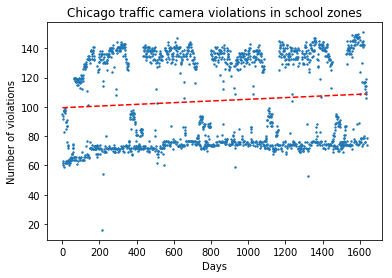

In [101]:
# Plot the number of active cameras for each day in the data set
active = np.array(active_cams_['CAMERA ID'])
days = list(range(1, len(active)+1))

plt.scatter(days, active, s = 2)

lm = np.polyfit(days, active, 1)
trendline = np.poly1d(lm)
plt.plot(days,trendline(days), "r--")

plt.title("Chicago traffic camera violations in school zones")
plt.xlabel("Days")
plt.ylabel("Number of violations")

plt.show()